In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data_pth = '/content/drive/MyDrive/SCCM_Datathon_Team1/data_clean.parquet'
df = pd.read_parquet(data_pth)


hypo_df = df[df['core_glucose']<70]


def violin_plots(y_val,df):
  df[y_val] = df[y_val].astype(str)
  plt.figure(figsize=(12, 6))
  sns.violinplot(data=df, x='delta_glucose', y=str(y_val), inner=None, cut=0, scale='width', palette='Set3')
  plt.xlabel('Glucose Variability')
  plt.title(f'Kernel Density Plot: Glucose Variability by {y_val}')
  plt.show()


#Ethnicity for all population
violin_plots('ethnicity',df)


#Ethnicity for hypoglycemic
violin_plots('ethnicity',hypo_df)

#Glucose variability distribution for all population
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='delta_glucose', fill=True)
plt.xlabel('Glucose Variability')
plt.title('Kernel Density Plot: Glucose Variability for entire population')
plt.show()

#Glucose variability distribution for hypoglycemic
plt.figure(figsize=(10, 6))
sns.kdeplot(data=hypo_df, x='delta_glucose', fill=True)
plt.xlabel('Glucose Variability')
plt.title('Kernel Density Plot: Glucose Variability for Hypoglycemic')
plt.show()

#scatter plots
def scat_plot(df,col):
  plt.scatter(df['delta_glucose'], df[col])
  plt.xlabel('Glucose Variability')
  plt.ylabel(col)
  plt.title(f'Scatter Plot of {col} vs Glucose Variability')
  plt.show()



In [20]:
grouped_df = df.groupby('ethnicity').agg({
    'delta_glucose': 'mean',
    'hosp_mort': lambda x: (x == 0).mean()
}).reset_index()

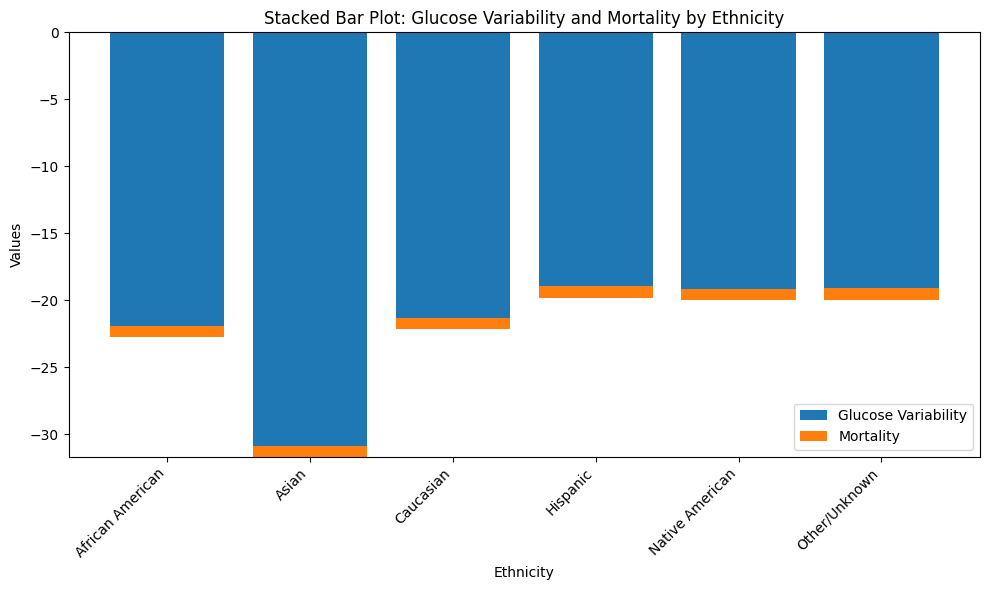

In [23]:

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(grouped_df['ethnicity'], grouped_df['delta_glucose'], label='Glucose Variability')

ax.bar(grouped_df['ethnicity'], grouped_df['hosp_mort'], bottom=grouped_df['delta_glucose'], label='Mortality')

# Set labels and title
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Values')
ax.set_title('Stacked Bar Plot: Glucose Variability and Mortality by Ethnicity')

# Add a legend
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


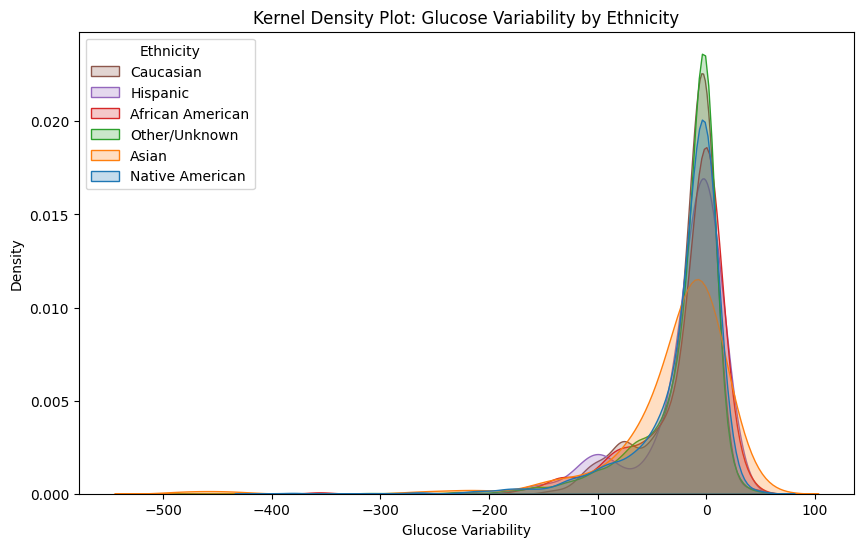

In [27]:

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='delta_glucose', hue='ethnicity', fill=True, common_norm=False, legend=True)
plt.xlabel('Glucose Variability')
plt.title('Kernel Density Plot: Glucose Variability by Ethnicity')
plt.legend(title='Ethnicity', labels=df['ethnicity'].unique(),loc='upper left')
plt.show()


In [9]:

import matplotlib.pyplot as plt
def violin_plots(y_val,df):
  df[y_val] = df[y_val].astype(str)
  plt.figure(figsize=(12, 6))
  sns.violinplot(data=df, x='delta_glucose', y=str(y_val), inner=None, cut=0, scale='width', palette='Set3')
  plt.xlabel('Glucose Variability')
  plt.title(f'Kernel Density Plot: Glucose Variability by {y_val}')
  plt.show()


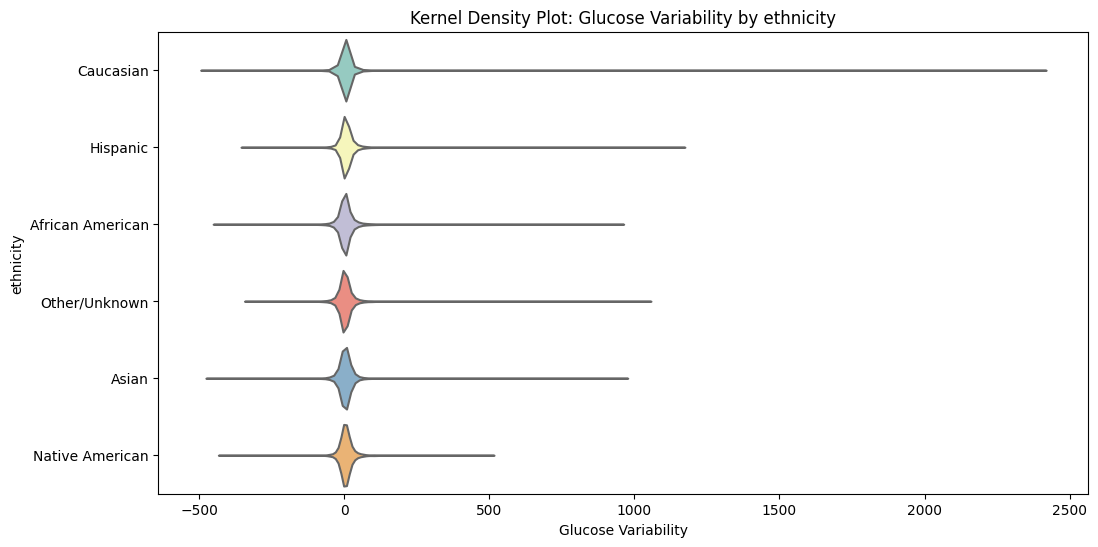

In [10]:
#Ethnicity
violin_plots('ethnicity',df)

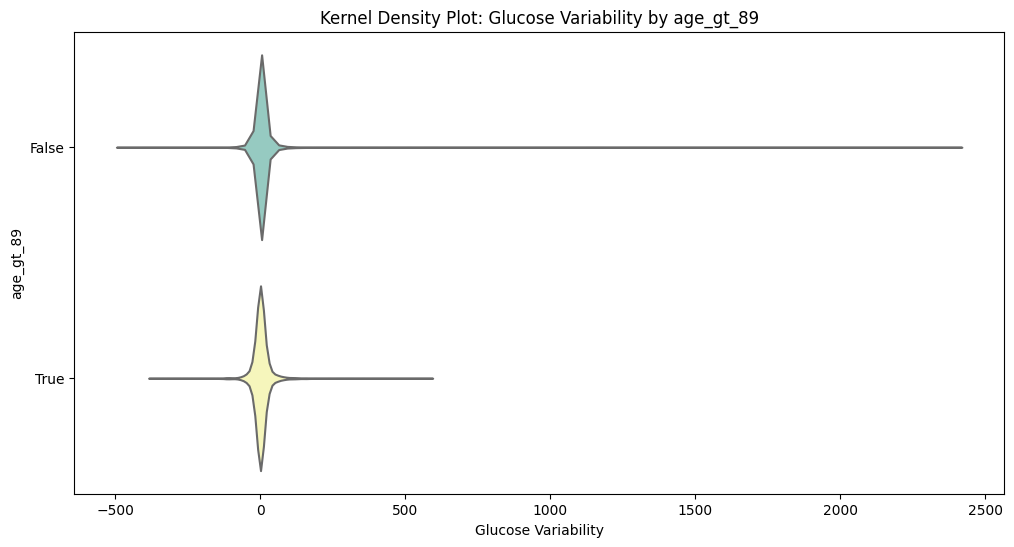

In [11]:
violin_plots('age_gt_89',df)

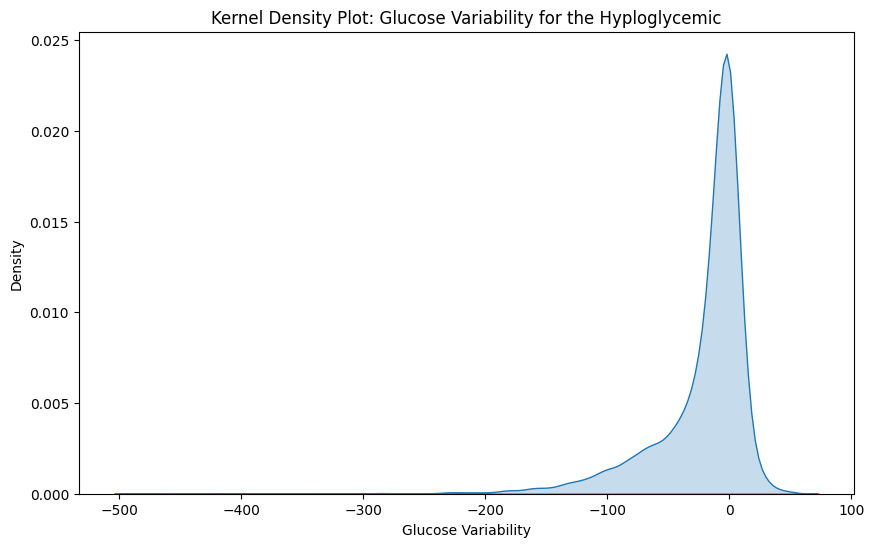

In [8]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='delta_glucose', fill=True)
plt.xlabel('Glucose Variability')
plt.title('Kernel Density Plot: Glucose Variability for the Hyploglycemic')
plt.show()